In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 101s 213ms/step - loss: 0.1839 - accuracy: 0.9418 - val_loss: 0.0445 - val_accuracy: 0.9852
Epoch 2/12
469/469 [==============================] - 102s 219ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0329 - val_accuracy: 0.9892
Epoch 3/12
469/469 [==============================] - 99s 211ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0259 - val_accuracy: 0.9912
Epoch 4/12
469/469 [==============================] - 101s 215ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0276 - val_accuracy: 0.9906
Epoch 5/12
469/469 [==============================] - 107s 228ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0243 - val_accuracy: 0.9923
Epoch 6/12
469/469 [==============================] - 99s 211ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0240 - val_accuracy: 0.9926
Epoch 7/12
469/469 [==============================] - 98s 210ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0222 - va

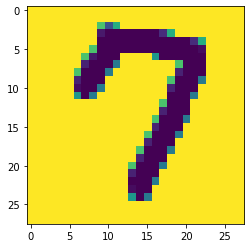

1/1 [==============================] - 0s 46ms/step
The Answer is  [7]


In [17]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('test7.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

#img_1 = cv2.imread('test8.png', cv2.IMREAD_COLOR)
#img_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
#plt.imshow(img_gray.reshape(28, 28), cmap='Greys', interpolation = 'nearest')

img = cv2.resize(255-img, (28, 28))
test_num = img.flatten() / 255.0
test_num = test_num.reshape((-1, 28, 28, 1))

#print(model.predict_classes(test_num))
#res = (model.predict(test_num) > 0.5).astype("int32")
res = model.predict(test_num)
predicted = res.argmax(axis=-1)
print('The Answer is ', predicted)